In [1]:
import numpy as np
import pandas as pd
from read_data import read_data
from image import image_process
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time


In [2]:
X,y = read_data()

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


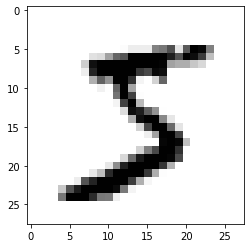

In [5]:
digits = X

img = image_process(digits)
img.show_image(0)


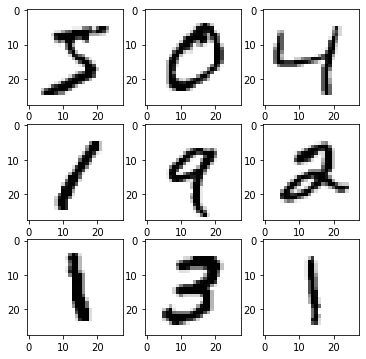

In [6]:
img = image_process(digits)
img.show_nine_image(0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# flatten the column vector y to 1-D array
y_train = np.ravel(y_train,order='c')
y_test = np.ravel(y_test, order='c')

In [8]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_train

array([9, 3, 3, ..., 7, 8, 6])

In [11]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


In [21]:
reg = LogisticRegression(solver="liblinear")

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.915047619047619

In [39]:
# cross-validation for Logistic Regression
cv = cross_val_score(reg, X_train, y_train, cv = 5)
print(cv)
print(cv.mean()) # average accuracy from cross-validation is 91.57% using logistic regression

[0.91653061 0.91469388 0.91561224 0.91489796 0.91693878]
0.9157346938775511


In [19]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.976047619047619

In [24]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9665238095238096

In [64]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9693333333333334

In [22]:
import time

def get_time():
    score = []
    execution_time = []
    models = [LogisticRegression(solver="liblinear"), MLPClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        score.append(model.score(X_test, y_test))
        execution_time.append(time.time()-start_time)
        
    return np.round(score,4), np.round(execution_time,4)


In [23]:
get_time()

([0.9170952380952381,
  0.9763333333333334,
  0.965952380952381,
  0.969047619047619],
 [53.78262209892273, 52.02589178085327, 21.645472764968872, 36.50537109375])

In [56]:
models = [KNeighborsClassifier]
for model in models:
    start_time = time.time()

    run_model = model()
    run_model.fit(X_train, y_train)
    print(run_model.score(X_test, y_test))

    print((time.time()-start_time))

0.9693333333333334
42.03450798988342


**Confusion Matrix**
1. Visualize and compare the performance of Logistic Regression and KNN
2. KNN has a higher accuracy across all digits compared to Logistic Regression
3. Both models show inaccurary with predicting digits 2, 3, and 8

In [4]:
reg = LogisticRegression(solver='liblinear')
reg.fit(X_train, y_train)
reg_predict = reg.predict(X_train)

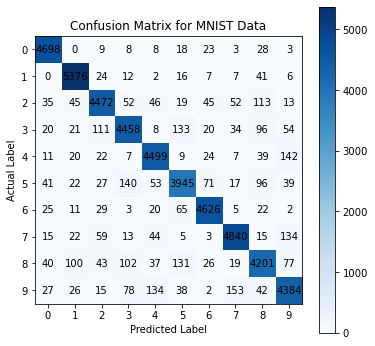

In [5]:
# confusion matrix for Logistic Regression
image_process.confusion_matrix(y_train, reg_predict)


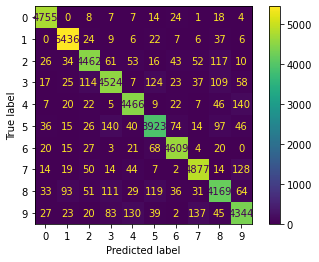

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = reg.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

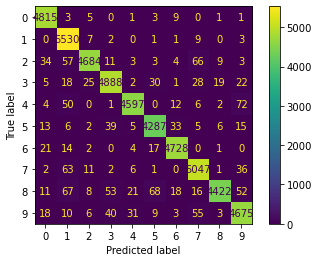

In [46]:
knn_y_train_pred = knn.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, knn_y_train_pred)